<a href="https://colab.research.google.com/github/sim-so/HandsOnML/blob/main/07_Ensemble_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07 앙상블 학습과 랜덤 포레스트 연습문제

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 5. 엑스트라 트리와 일반 랜덤 포레스트
무엇이 엑스트라 트리를 일반 랜덤 포레스트보다 더 무작위하게 만드나요? 추가적인 무작위성이 어떻게 도움이 될까요? 엑스트라 트리는 랜덤 포레스트보다 느릴까요, 빠를까요?

- 엑스트라 트리와 랜덤 포레스트 모두 각 노드에서 특성의 일부를 무작위로 선택합니다.
- 랜덤 포레스트는 특성을 분할할 때 불순도(또는 엔트로피)를 최소화하는 최적의 임계점을 찾습니다.
- 엑스트라 트리는 최적의 임계점을 찾지 않고 랜덤한 임계점에 따라 분할합니다.
- 특성 분할의 임계점을 랜덤하게 정하기 때문에 개별 예측기의 예측력은 낮아지지만 모델이 과대적합될 위험을 낮춥니다.
- 최적의 임계점을 찾기 위한 연산을 하지 않으므로 랜덤 포레스트보다 훈련에 걸리는 속도가 빠릅니다.
- 예측에 걸리는 시간은 크게 다르지 않습니다.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [4]:
X_train, X_test = mnist["data"][:60000], mnist["data"][60000:]
y_train, y_test = mnist["target"][:60000], mnist["target"][60000:]

In [5]:
import time

start_time = time.time()

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=33)
rnd_clf.fit(X_train, y_train)

print("Random Forest Training :", time.time() - start_time)

Random Forest Training : 66.69427800178528


In [6]:
start_time = time.time()

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, random_state=33)
ext_clf.fit(X_train, y_train)

print("Extra Trees Training   :", time.time() - start_time)

Extra Trees Training   : 45.872535943984985


In [7]:
start_time = time.time()

rf_pred = rnd_clf.predict(X_test)
print("Random Forest Inference :", time.time() - start_time)

Random Forest Inference : 0.699131965637207


In [8]:
start_time = time.time()

et_pred = ext_clf.predict(X_test)
print("Extra Trees Inference   :", time.time() - start_time)

Extra Trees Inference   : 0.6593449115753174


In [9]:
from sklearn.metrics import accuracy_score

print("Random Forest Accuracy : ", accuracy_score(y_test, rf_pred))
print("Extra Trees Accuracy   : ", accuracy_score(y_test, et_pred))

Random Forest Accuracy :  0.8285
Extra Trees Accuracy   :  0.8164


In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="hot", interpolation="nearest")
    plt.axis("off")

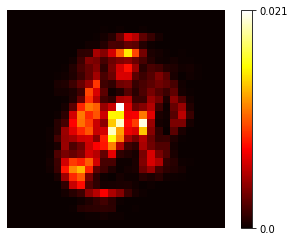

In [11]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels([rnd_clf.feature_importances_.min(), 0.021])
plt.show()

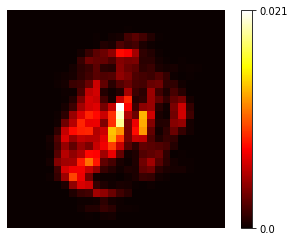

In [12]:
plot_digit(ext_clf.feature_importances_)

cbar = plt.colorbar(ticks=[ext_clf.feature_importances_.min(), ext_clf.feature_importances_.max()])
cbar.ax.set_yticklabels([ext_clf.feature_importances_.min(), 0.021])
plt.show()

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

In [14]:
start_time = time.time()
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=33)
rnd_clf.fit(iris["data"], iris["target"])
print("Random Forest Training : ", time.time() - start_time)

Random Forest Training :  0.740586519241333


In [15]:
start_time = time.time()
ext_clf = ExtraTreesClassifier(n_estimators=500, max_depth=3, random_state=33)
ext_clf.fit(iris["data"], iris["target"])
print("Extra Trees Training   : ", time.time() - start_time)

Extra Trees Training   :  0.4783961772918701


In [16]:
start_time = time.time()
rf_pred = rnd_clf.predict(iris["data"])
print("Random Forest Inference : ", time.time() - start_time)
print(accuracy_score(iris["target"], rf_pred))

Random Forest Inference :  0.09370803833007812
0.9666666666666667


In [17]:
start_time = time.time()
et_pred = ext_clf.predict(iris["data"])
print("Random Forest Inference : ", time.time() - start_time)
print(accuracy_score(iris["target"], et_pred))

Random Forest Inference :  0.08784151077270508
0.9666666666666667


## 6. AdaBoost 학습 성능 높이기
에이다부스트 앙상블이 훈련 데이터에 과소적합되었다면 어떤 매개변수를 어떻게 바꾸어야 할까요?
- 예측기 수 증가
- 학습률 증가
- 기반 예측기의 규제 변수 완화

In [24]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate=0.1, random_state=33)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=33)

In [25]:
ad_pred = ada_clf.predict(X_test)
accuracy_score(y_test, ad_pred)

0.7265

In [26]:
ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 50,
 'random_state': 33}

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=33)
ada_clf2 = AdaBoostClassifier(tree_clf,
                              n_estimators=200,
                              learning_rate=0.2,
                              random_state=33)

In [35]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=33),
                   learning_rate=0.2, n_estimators=200, random_state=33)

In [36]:
ad_pred2 = ada_clf2.predict(X_test)
accuracy_score(y_test, ad_pred2)

0.9099

In [37]:
ada_clf2.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 3,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 33,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=33),
 'learning_rate': 0.2,
 'n_estimators': 200,
 'random_state': 33}